In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

test_val = pd.read_csv('sample_submission.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
train.shape

(8523, 12)

In [5]:
train.apply(lambda x: sum(x.isna()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
test.shape

(5681, 11)

In [8]:
test.apply(lambda x: sum(x.isna()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].dropna().mean())
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode()[0])

In [11]:
train.apply(lambda x: sum(x.isna()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [13]:
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].dropna().mean())
test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode()[0])

In [14]:
test.isna().sum().any()

False

In [15]:
train['Item_Identifier'].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

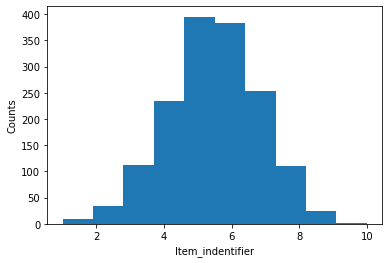

In [16]:
train['Item_Identifier'].value_counts(normalize= True)
train['Item_Identifier'].value_counts().plot.hist()
plt.xlabel('Item_indentifier')
plt.ylabel('Counts')
plt.show()

(array([1.753e+03, 1.527e+03, 1.377e+03, 1.071e+03, 9.110e+02, 6.160e+02,
        4.400e+02, 2.890e+02, 2.260e+02, 1.330e+02, 8.300e+01, 4.100e+01,
        2.500e+01, 1.100e+01, 1.200e+01, 4.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([   33.29   ,   685.97374,  1338.65748,  1991.34122,  2644.02496,
         3296.7087 ,  3949.39244,  4602.07618,  5254.75992,  5907.44366,
         6560.1274 ,  7212.81114,  7865.49488,  8518.17862,  9170.86236,
         9823.5461 , 10476.22984, 11128.91358, 11781.59732, 12434.28106,
        13086.9648 ]),
 <BarContainer object of 20 artists>)

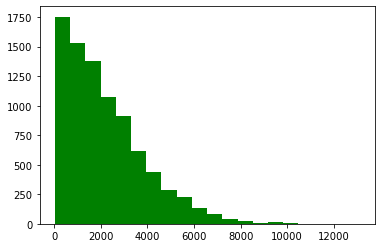

In [17]:
plt.hist(train['Item_Outlet_Sales'], bins= 20, color = 'green')

Text(0, 0.5, 'counts')

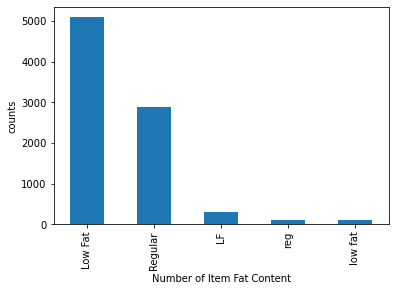

In [18]:
train['Item_Fat_Content'].value_counts(normalize= True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.xlabel('Number of Item Fat Content')
plt.ylabel('counts')

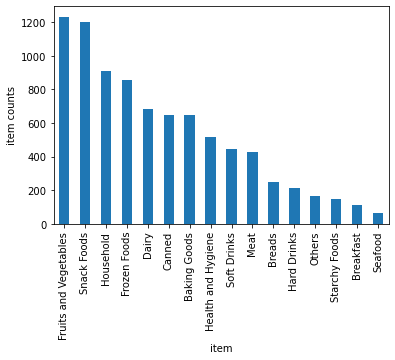

In [19]:
train['Item_Type'].value_counts(normalize=True)
train['Item_Type'].value_counts().plot.bar()
plt.xlabel('item')
plt.ylabel('item counts')
plt.show()

In [20]:
data = pd.concat([train, test])
data.shape

(14204, 12)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                14204 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                14204 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [22]:
data['Item_Identifier'] = data['Item_Identifier'].apply(lambda x: x[0:2])

In [23]:
data['Item_Identifier'].value_counts()

FD    10201
NC     2686
DR     1317
Name: Item_Identifier, dtype: int64

In [24]:
data['Item_Identifier'] = data['Item_Identifier'].map({'FD' : 'Food', 'NC' : 'Non_Consumable', 'DR' : 'Drinks'})

In [25]:
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [26]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg' : 'Regular', 'low fat' : 'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [27]:
data['Outlet_year'] = 2013 - data['Outlet_Establishment_Year']
data['Outlet_year'].value_counts()

28    2439
26    1553
14    1550
16    1550
9     1550
11    1548
4     1546
6     1543
15     925
Name: Outlet_year, dtype: int64

In [28]:
data['Item_Type'].value_counts()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [29]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_year
0,Food,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,14
1,Drinks,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,4
2,Food,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,14
3,Food,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,15
4,Non_Consumable,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,26


In [30]:
data.drop(['Outlet_Establishment_Year'], axis= 1 , inplace= True)

In [31]:
columns = ['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Outlet_year']

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for i in columns:
    data[i] = le.fit_transform(data[i])

In [32]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_year
0,1,9.30,0,0.016047,4,249.8092,9,1,0,1,3735.1380,4
1,0,5.92,1,0.019278,14,48.2692,3,1,2,2,443.4228,0
2,1,17.50,0,0.016760,10,141.6180,9,1,0,1,2097.2700,4
3,1,19.20,1,0.000000,6,182.0950,0,1,2,0,732.3800,5
4,2,8.93,0,0.000000,9,53.8614,1,0,2,1,994.7052,7


In [33]:
data = pd.get_dummies(data= data, columns= columns, drop_first= True)

In [34]:
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_1,Item_Identifier_2,Item_Fat_Content_1,Item_Type_1,Item_Type_2,Item_Type_3,...,Outlet_Type_2,Outlet_Type_3,Outlet_year_1,Outlet_year_2,Outlet_year_3,Outlet_year_4,Outlet_year_5,Outlet_year_6,Outlet_year_7,Outlet_year_8
0,9.30,0.016047,249.8092,3735.1380,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,17.50,0.016760,141.6180,2097.2700,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [35]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales',
       'Item_Identifier_1', 'Item_Identifier_2', 'Item_Fat_Content_1',
       'Item_Type_1', 'Item_Type_2', 'Item_Type_3', 'Item_Type_4',
       'Item_Type_5', 'Item_Type_6', 'Item_Type_7', 'Item_Type_8',
       'Item_Type_9', 'Item_Type_10', 'Item_Type_11', 'Item_Type_12',
       'Item_Type_13', 'Item_Type_14', 'Item_Type_15', 'Outlet_Identifier_1',
       'Outlet_Identifier_2', 'Outlet_Identifier_3', 'Outlet_Identifier_4',
       'Outlet_Identifier_5', 'Outlet_Identifier_6', 'Outlet_Identifier_7',
       'Outlet_Identifier_8', 'Outlet_Identifier_9', 'Outlet_Size_1',
       'Outlet_Size_2', 'Outlet_Location_Type_1', 'Outlet_Location_Type_2',
       'Outlet_Type_1', 'Outlet_Type_2', 'Outlet_Type_3', 'Outlet_year_1',
       'Outlet_year_2', 'Outlet_year_3', 'Outlet_year_4', 'Outlet_year_5',
       'Outlet_year_6', 'Outlet_year_7', 'Outlet_year_8'],
      dtype='object')

In [36]:
train = data[ : 8523]
test = data[8523 : ]
test.drop(['Item_Outlet_Sales'], axis=1, inplace=True)

In [37]:
x = train.drop(['Item_Outlet_Sales'], axis=1)
y = train['Item_Outlet_Sales']

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.75, random_state=123)

In [39]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6392, 45), (6392,), (2131, 45), (2131,))

## Modeling
## Linear Regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [41]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [42]:
lr_pred_ = lr.predict(x_test)

In [43]:
mse = mean_squared_error(y_true= y_test, y_pred= lr_pred_)
print("RMSE :", np.sqrt(mse))
print("Variance score : %2f" %r2_score(y_true= y_test, y_pred= lr_pred_))

RMSE : 1119.3778495278812
Variance score : 0.570063


In [44]:
lr_pred_org = lr.predict(test)

In [45]:
dataset01 = pd.DataFrame({'Item_Identifier': test_val['Item_Identifier'],
                         'Outlet_Identifier' : test_val['Outlet_Identifier'],
                         'Item_Outlet_Sales' : lr_pred_org}, columns= test_val.columns)

In [46]:
dataset01.to_csv('sample_submission01.csv', index=False)

## AdaBoost Regressor

In [47]:
from sklearn.ensemble import AdaBoostRegressor

In [48]:
abr = AdaBoostRegressor(n_estimators= 100, random_state=123)
abr.fit(x_train, y_train)

AdaBoostRegressor(n_estimators=100, random_state=123)

In [49]:
abr.get_params()

{'base_estimator': None,
 'learning_rate': 1.0,
 'loss': 'linear',
 'n_estimators': 100,
 'random_state': 123}

In [50]:
abr_pred_ = abr.predict(x_test)

mse02 = mean_squared_error(y_true= y_test, y_pred= abr_pred_)
print("RMSE :", np.sqrt(mse02))

RMSE : 1251.755294757679


## Random Forest Regressor

In [51]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rfr = RandomForestRegressor(n_estimators= 500, n_jobs= -1, random_state=123)
rfr.fit(x_train, y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=123)

In [53]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [54]:
rfr_pred_ = rfr.predict(x_test)

mse03 = mean_squared_error(y_true= y_test, y_pred= rfr_pred_)
print("RMSE :", np.sqrt(mse03))

print("Variance score : %2f" % r2_score(y_test, rfr_pred_))

RMSE : 1137.1564863901763
Variance score : 0.556297


In [55]:
rfr_pred_org = rfr.predict(test)

In [56]:
dataset02 = pd.DataFrame({'Item_Identifier': test_val['Item_Identifier'],
                         'Outlet_Identifier' : test_val['Outlet_Identifier'],
                         'Item_Outlet_Sales' : rfr_pred_org}, columns= test_val.columns)

In [57]:
dataset02.to_csv('sample_submission02.csv', index=False)

## XGBoost

In [71]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV

In [72]:
params_ = [{'base_score' : [0.5,0.1,0.15,0.2,0.25],
           'learning_rate' : [0.001,0.01,0.1,1,10],
           'max_depth' : [5,7,9,13,15,17,19],
           'n_estimators' : [200,300,500,600,800]}]

In [73]:
xgb_search = RandomizedSearchCV(estimator= XGBRegressor(), param_distributions= params_, cv=5,verbose=123)

xgb_search.fit(x_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500
[CV 1/5; 1/10] END base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500;, score=0.405 total time=   4.4s
[CV 2/5; 1/10] START base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500
[CV 2/5; 1/10] END base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500;, score=0.279 total time=   5.1s
[CV 3/5; 1/10] START base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500
[CV 3/5; 1/10] END base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500;, score=0.262 total time=   4.7s
[CV 4/5; 1/10] START base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500
[CV 4/5; 1/10] END base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500;, score=0.214 total time=   4.2s
[CV 5/5; 1/10] START base_score=0.5, learning_rate=1, max_depth=7, n_estimators=500
[CV 5/5; 1/10] END base_score=0.5, learning_rate=1, max_dep

[CV 1/5; 9/10] END base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800;, score=0.078 total time=  23.2s
[CV 2/5; 9/10] START base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800
[CV 2/5; 9/10] END base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800;, score=0.121 total time=  20.6s
[CV 3/5; 9/10] START base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800
[CV 3/5; 9/10] END base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800;, score=0.045 total time=  20.8s
[CV 4/5; 9/10] START base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800
[CV 4/5; 9/10] END base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800;, score=0.028 total time=  22.1s
[CV 5/5; 9/10] START base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800
[CV 5/5; 9/10] END base_score=0.2, learning_rate=0.001, max_depth=17, n_estimators=800;, score=0.104 total time=  21.3s
[CV 1/5; 10/10] START base_score=0.1, learni

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          min_child_weight=None, missing=nan,
                            

In [75]:
xgb_search.best_estimator_

XGBRegressor(base_score=0.1, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.1, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [76]:
xgb_pred_ = xgb_search.predict(x_test)

mse04 = mean_squared_error(y_true= y_test, y_pred= xgb_pred_)
print("RMSE :", np.sqrt(mse04))

print("Variance score : %2f" % r2_score(y_test, xgb_pred_))

RMSE : 1135.1247637292734
Variance score : 0.557881


In [77]:
xgb_pred_org = xgb.predict(test)

In [78]:
dataset03 = pd.DataFrame({'Item_Identifier': test_val['Item_Identifier'],
                         'Outlet_Identifier' : test_val['Outlet_Identifier'],
                         'Item_Outlet_Sales' : xgb_pred_org}, columns= test_val.columns)

In [79]:
dataset03.to_csv('sample_submission03.csv', index=False)